# Results


In [1]:
using DrWatson
@quickactivate
include(srcdir("main.jl"))

"/Users/zijin/projects/psp_conjunction/figures"

In [20]:
begin
    enc = "enc2" # event id (encounter id)    
    thm_df = load(enc, "thm"; dataset="ARTEMIS");
    wind_df = load(enc, "wind"; dataset="Wind");
    mkpath("$fig_dir/$enc")
end

"/Users/zijin/projects/psp_conjunction/figures/enc2"

In [2]:
enc = "enc7"
psp_df = load(enc, "psp"; dataset="Parker Solar Probe");

┌ Warning: automatically converting Arrow.Timestamp with precision = MICROSECOND to `Dates.DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/5pHqZ/src/eltypes.jl:273
┌ Warning: automatically converting Arrow.Timestamp with precision = NANOSECOND to `Dates.DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/5pHqZ/src/eltypes.jl:273


In [3]:
psp_df

Row,time,tstart,tstop,t.d_end,t.d_start,t.d_time,index_diff,len,std,std_prev,std_next,index_std,index_fluctuation,B.after,B.before,b_mag,b_n,bn_over_b,d_star,db_mag,db_over_b,db_over_b_max,fit.stat.chisqr,fit.stat.rsquared,fit.vars.amplitude,fit.vars.c,fit.vars.sigma,rotation_angle,dB_x,dB_y,dB_z,dB_lmn_x,dB_lmn_y,dB_lmn_z,k_x,k_y,k_z,Vl_x,Vl_y,Vl_z,Vn_x,Vn_y,Vn_z,duration,plasma_density,v_R,v_T,v_N,n.before,v_R_before,v_T_before,v_N_before,n.after,v_R_after,v_T_after,v_N_after,v_l,v_n,v_k,L_k,j0_k,ion_inertial_length,Alfven_speed,j_Alfven,L_k_norm,j0_k_norm,v.ion.before.l,v.ion.after.l,B.vec.before.l,B.vec.before.m,B.vec.before.n,B.vec.after.l,B.vec.after.m,B.vec.after.n,v.Alfven.before,v.Alfven.after,v.Alfven.before.l,v.Alfven.after.l,n.change,v.ion.change.l,B.change,v.Alfven.change,v.Alfven.change.l,ion_temp_para,ion_temp_perp,Λ_ion,B.mean,n.mean,dB_over_B,dn_over_n,v_l_ratio,Λ_t,dataset
,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,Float64,UInt32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…
1,2021-01-16T00:02:56,2021-01-16T00:02:48,2021-01-16T00:03:04,2021-01-16T00:02:56.387,2021-01-16T00:02:52.892,2021-01-16T00:02:53.616,0.223935,73,21.8028,6.5537,5.67249,3.32679,2.05467,165.386,164.065,165.561,-162.937,-0.984155,43.7493,1.32119,0.0079801,0.0301361,272.474,0.957441,62.0766,-29.2496,0.354729,21.6965,-13.3622,58.0003,17.4297,-61.8249,4.20518,-2.52432,0.104344,-0.264101,0.958834,-0.186328,0.959441,0.211554,-0.971705,-0.211773,0.104598,0.709458,476.3,392.639,-131.16,18.2994,530.133,377.368,-127.83,17.3926,482.855,390.037,-130.145,18.1661,-195.128,351.839,93.1551,66.0896,373.727,10.4347,165.423,12623.7,6.33362,0.0296052,-189.281,-193.698,-21.4584,-7.43669,-162.486,40.3665,-11.6419,-159.961,155.382,164.123,-20.3227,40.0582,-47.2774,4.41732,1.32119,8.7404,60.3809,39.9045,36.7328,0.011209,164.726,506.494,0.00802056,-0.0933425,0.0731576,0.994648,Parker Solar Probe
2,2021-01-16T00:22:08,2021-01-16T00:22:00,2021-01-16T00:22:16,2021-01-16T00:22:12.446,2021-01-16T00:22:08.077,2021-01-16T00:22:11.084,0.240314,73,28.2155,12.8338,7.88527,2.19853,1.18409,171.129,173.223,172.258,-165.028,-0.958029,27.5639,-2.09414,0.012157,0.0208785,673.993,0.955055,98.6891,-40.8034,0.895092,27.2526,8.49945,-60.5575,53.3477,-81.0832,3.244,-0.640998,0.0170302,-0.659584,-0.751438,0.12094,-0.719665,0.683707,-0.969938,0.0608514,0.235623,1.79018,486.855,391.436,-126.285,30.813,475.632,390.593,-123.203,25.1834,423.756,387.673,-108.341,-2.11243,159.291,380.093,66.8078,119.598,328.325,10.321,170.238,13279.0,11.5879,0.0247251,153.121,123.41,-42.1345,40.8112,-162.988,38.9487,37.5672,-162.347,173.2,181.277,-42.129,41.2584,-51.8753,29.7116,-2.09414,8.07705,83.3874,27.8461,37.9092,-0.0332743,172.176,449.694,-0.0121628,-0.115357,0.356308,0.873045,Parker Solar Probe
3,2021-01-16T00:24:48,2021-01-16T00:24:40,2021-01-16T00:24:56,2021-01-16T00:24:54.102,2021-01-16T00:24:41.432,2021-01-16T00:24:49.381,0.13746,73,10.6284,5.14667,2.28836,2.0651,1.2568,173.214,174.004,173.379,171.359,0.988346,7.26591,-0.790607,0.00455998,0.0185893,297.733,0.949709,23.5641,-10.6335,0.810775,9.77085,-4.13298,-25.2855,14.7847,-29.5681,0.249394,0.832459,-0.000575224,-0.504688,-0.863301,-0.110906,-0.860179,0.497788,0.984221,-0.0255761,0.175086,1.62155,449.687,390.437,-108.574,1.39496,428.934,389.767,-110.267,3.78003,432.237,388.698,-116.086,8.35642,50.7854,387.298,53.367

In [113]:
begin
    df = reduce(
        vcat,
        [psp_df, thm_df, wind_df],
        cols=:intersect
    )

    df.dataset = categorical(df.dataset)
    levels!(df.dataset, ["Parker Solar Probe", "ARTEMIS", "Wind"])

    earth_df = reduce(
        vcat,
        [thm_df, wind_df],
        cols=:intersect
    )
end;

In [117]:
begin
    # base data layer
    data_layer = data(df) * mapping(color=ds_mapping, marker=ds_mapping)

    # data layer with different alpha
    data_layer_a = (
        (data(thm_df) + data(wind_df)) * visual(alpha=0.3) + data(psp_df) * visual(alpha=1)
    ) * mapping(
        color=ds_mapping, marker=ds_mapping
    )

    # data layer with 1au missions
    data_layer_b = (
        (data(wind_df) + data(thm_df))
    ) * mapping(
        color=:dataset, marker=:dataset
    )
end;

## Discontinuities' properties

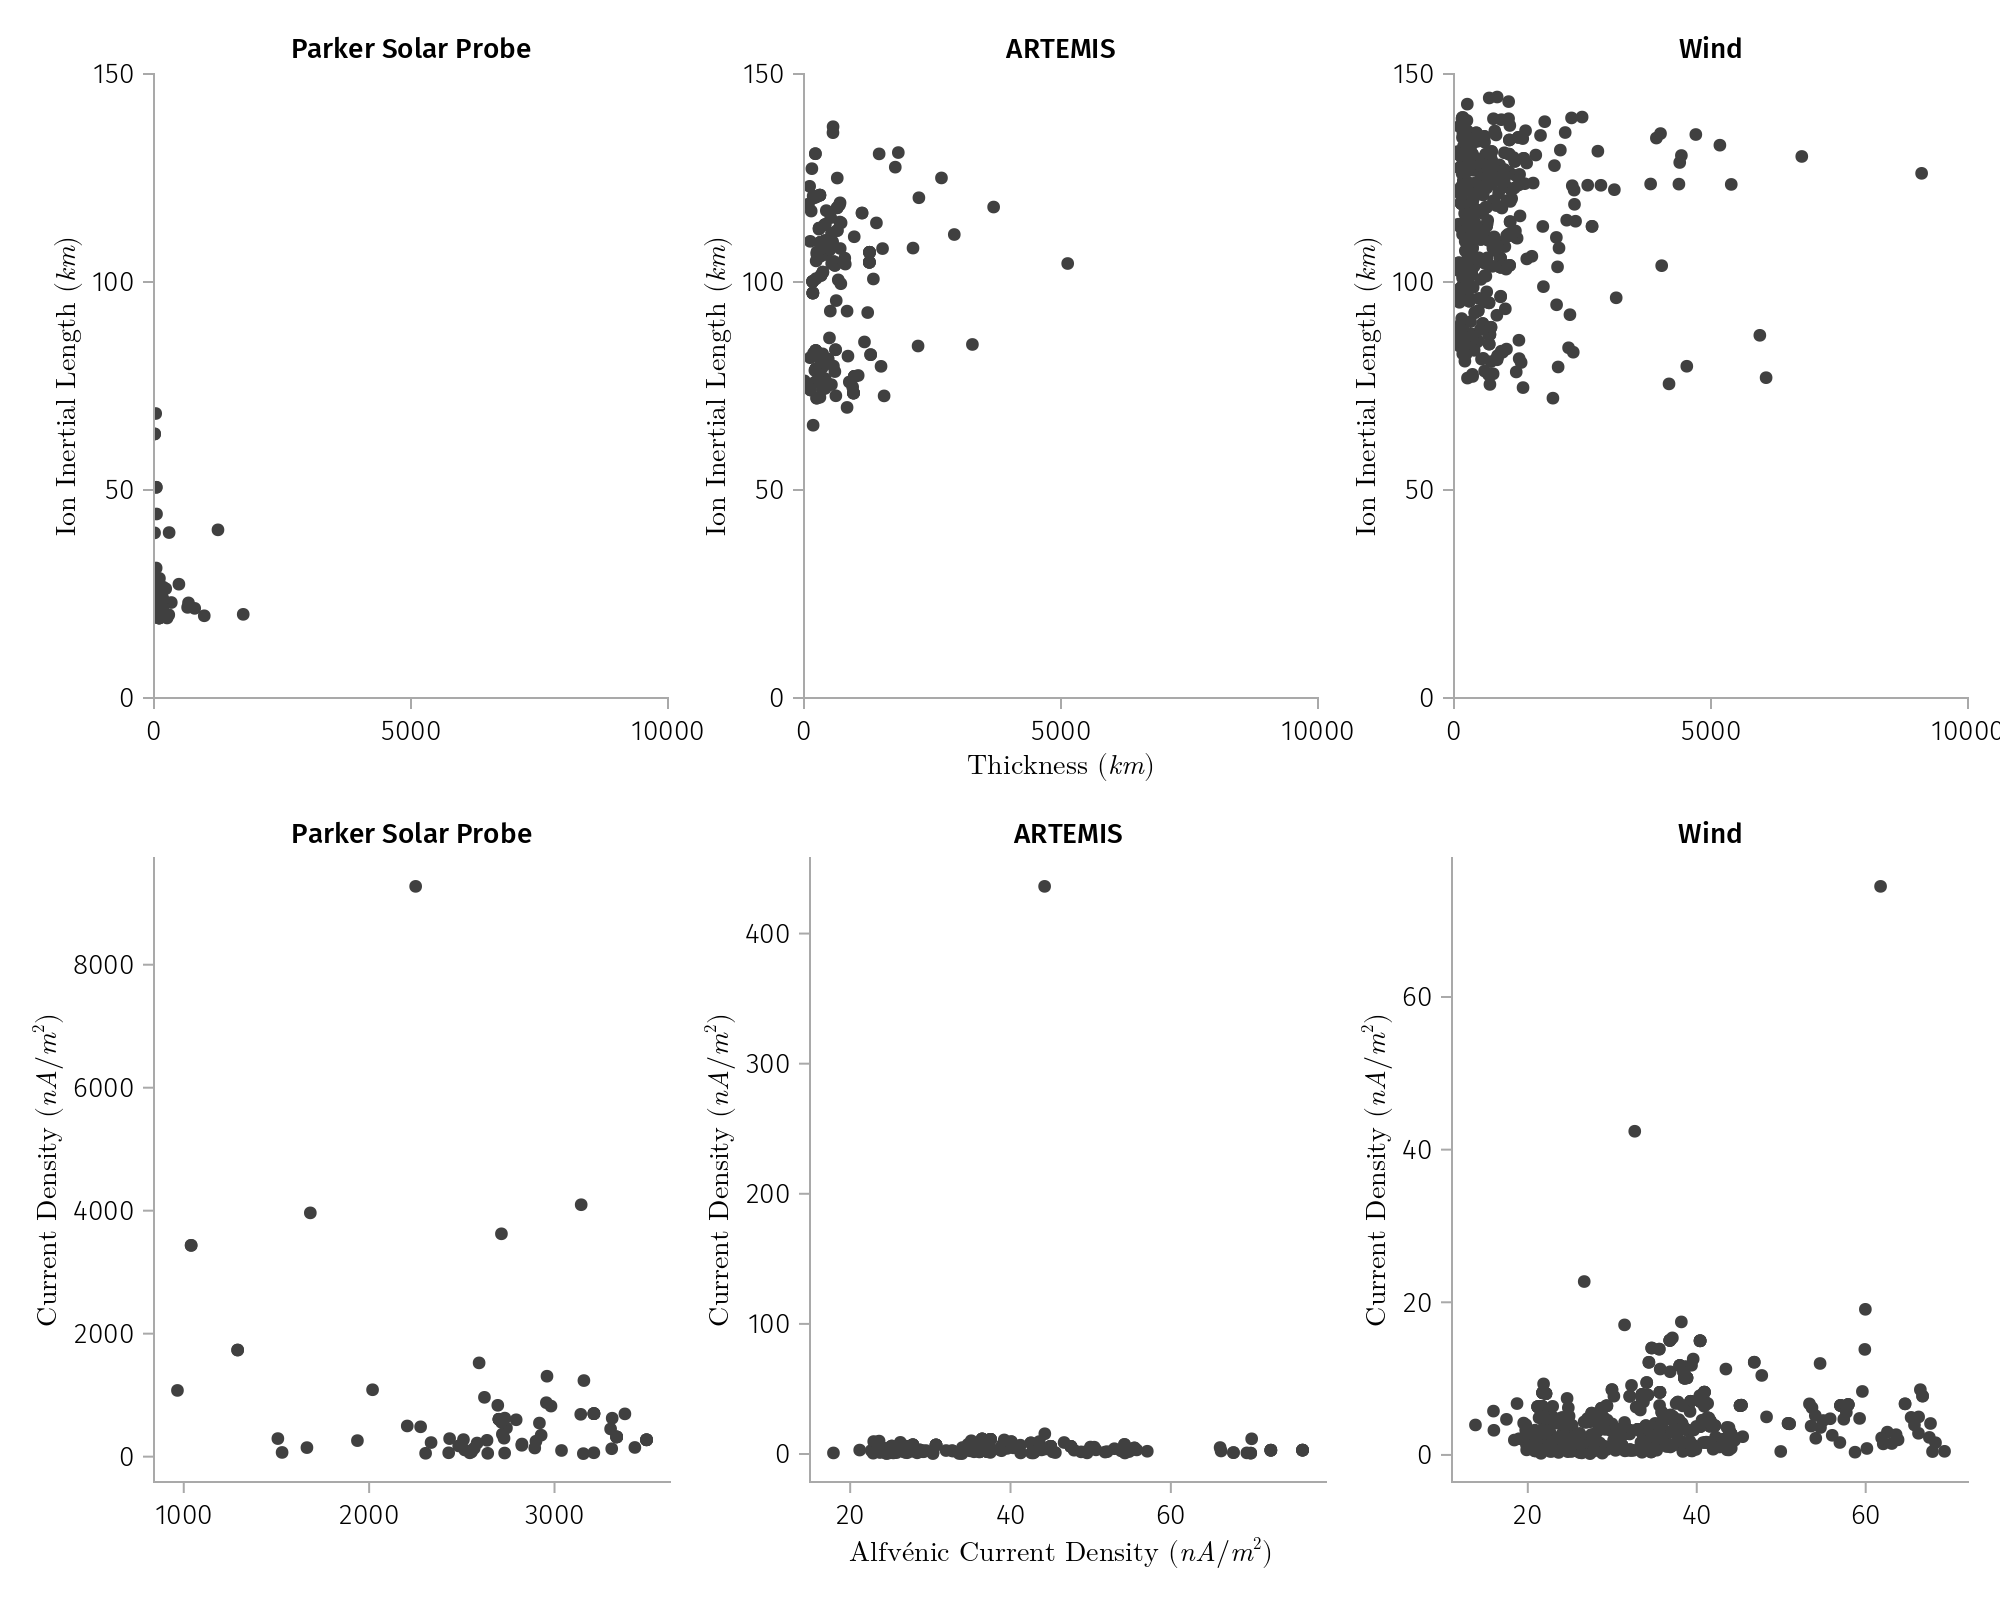

In [48]:
function plot_l_j_local_comp(df)
    fig = Figure(size=(1000, 800))

    data_layer = data(df) * mapping(col=:dataset)
    
    facet = (; linkxaxes = :none, linkyaxes = :none)
    # Thickness Panels
    begin
        plt = data_layer * mapping(l_map, di_map)
        # plt *= histogram(normalization=:pdf)
    
        limits = ((0, 10000), (0, 150))
        axis = (;limits=limits)

        draw!(fig[1,1:3], plt, axis=axis, facet=facet) 
    end

    # Current Density Panels
    begin
        plt = data_layer * mapping(jA_map, j_map)
        # plt *= histogram(normalization=:pdf)
        # axis = (;limits=j_log_limit)
        axis = (;)
        draw!(fig[2,1:3], plt, axis=axis, facet=facet) 
    end

    fig
end

df |> keep_good_fit |> plot_l_j_local_comp

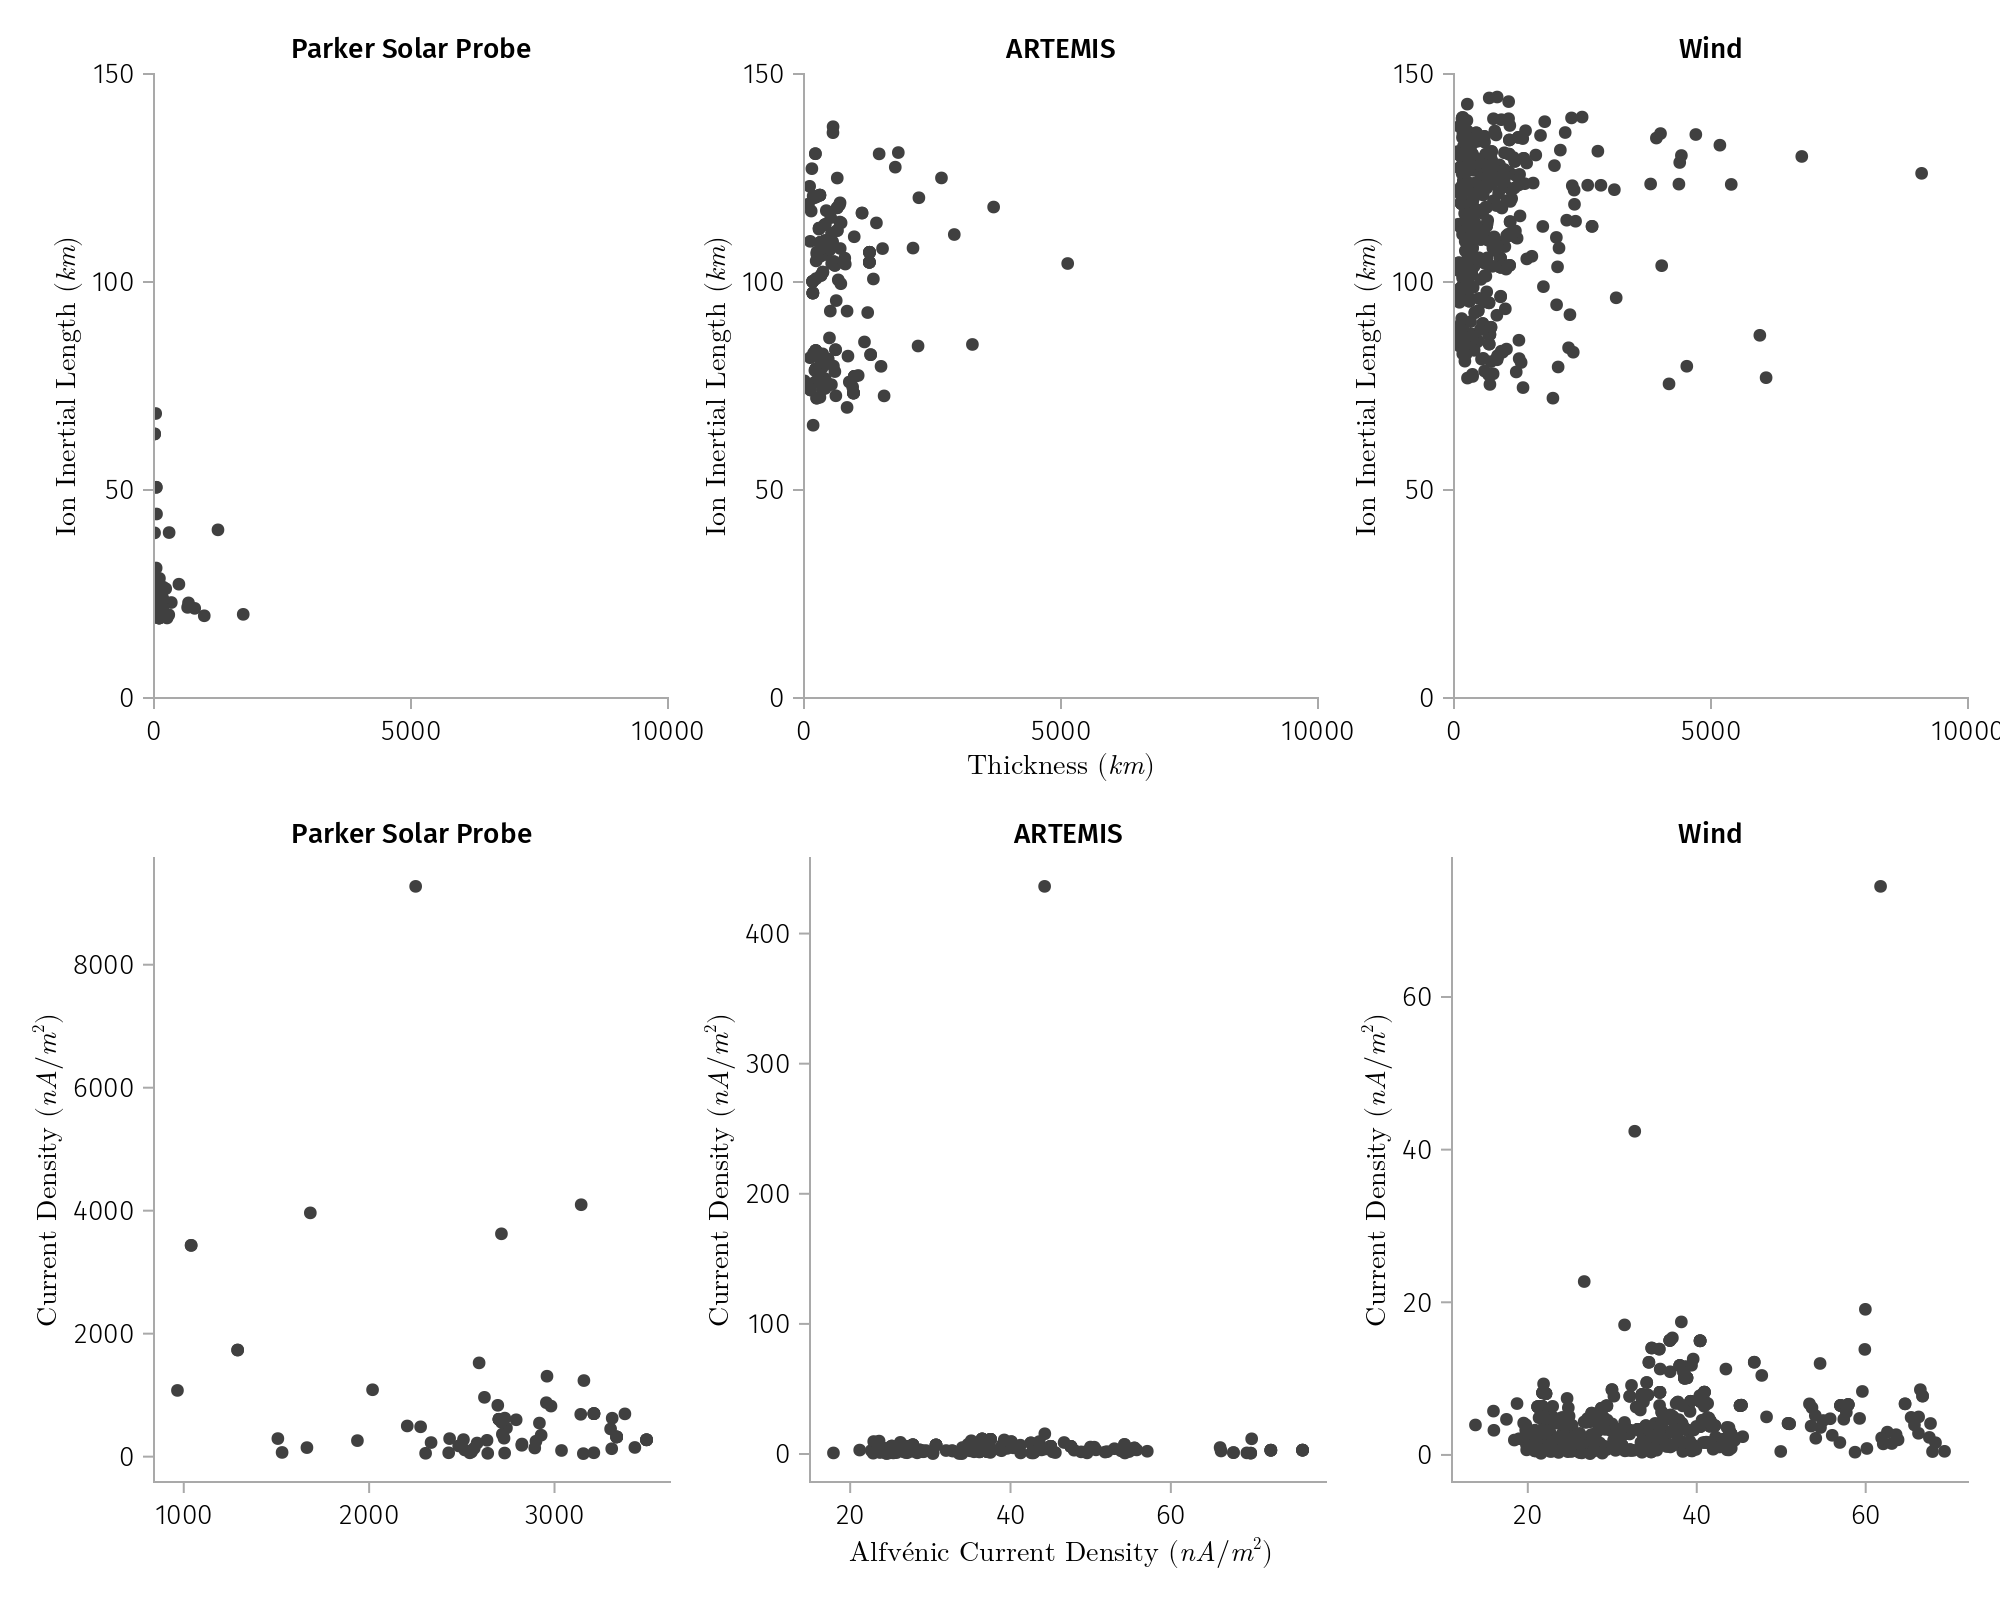

In [35]:
function plot_l_j_local_comp(df)
    fig = Figure(size=(1000, 800))

    data_layer = data(df) * mapping(col=:dataset)
    
    facet = (; linkxaxes = :none, linkyaxes = :none)
    # Thickness Panels
    begin
        plt = data_layer * mapping(l_map, di_map)
        # plt *= histogram(normalization=:pdf)
    
        limits = ((0, 10000), (0, 150))
        axis = (;limits=limits)

        draw!(fig[1,1:3], plt, axis=axis, facet=facet) 
    end

    # Current Density Panels
    begin
        plt = data_layer * mapping(jA_map, j_map)
        # plt *= histogram(normalization=:pdf)
        # axis = (;limits=j_log_limit)
        axis = (;)
        draw!(fig[2,1:3], plt, axis=axis, facet=facet) 
    end

    fig
end

df |> keep_good_fit |> plot_l_j_local_comp

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/thickness_current.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


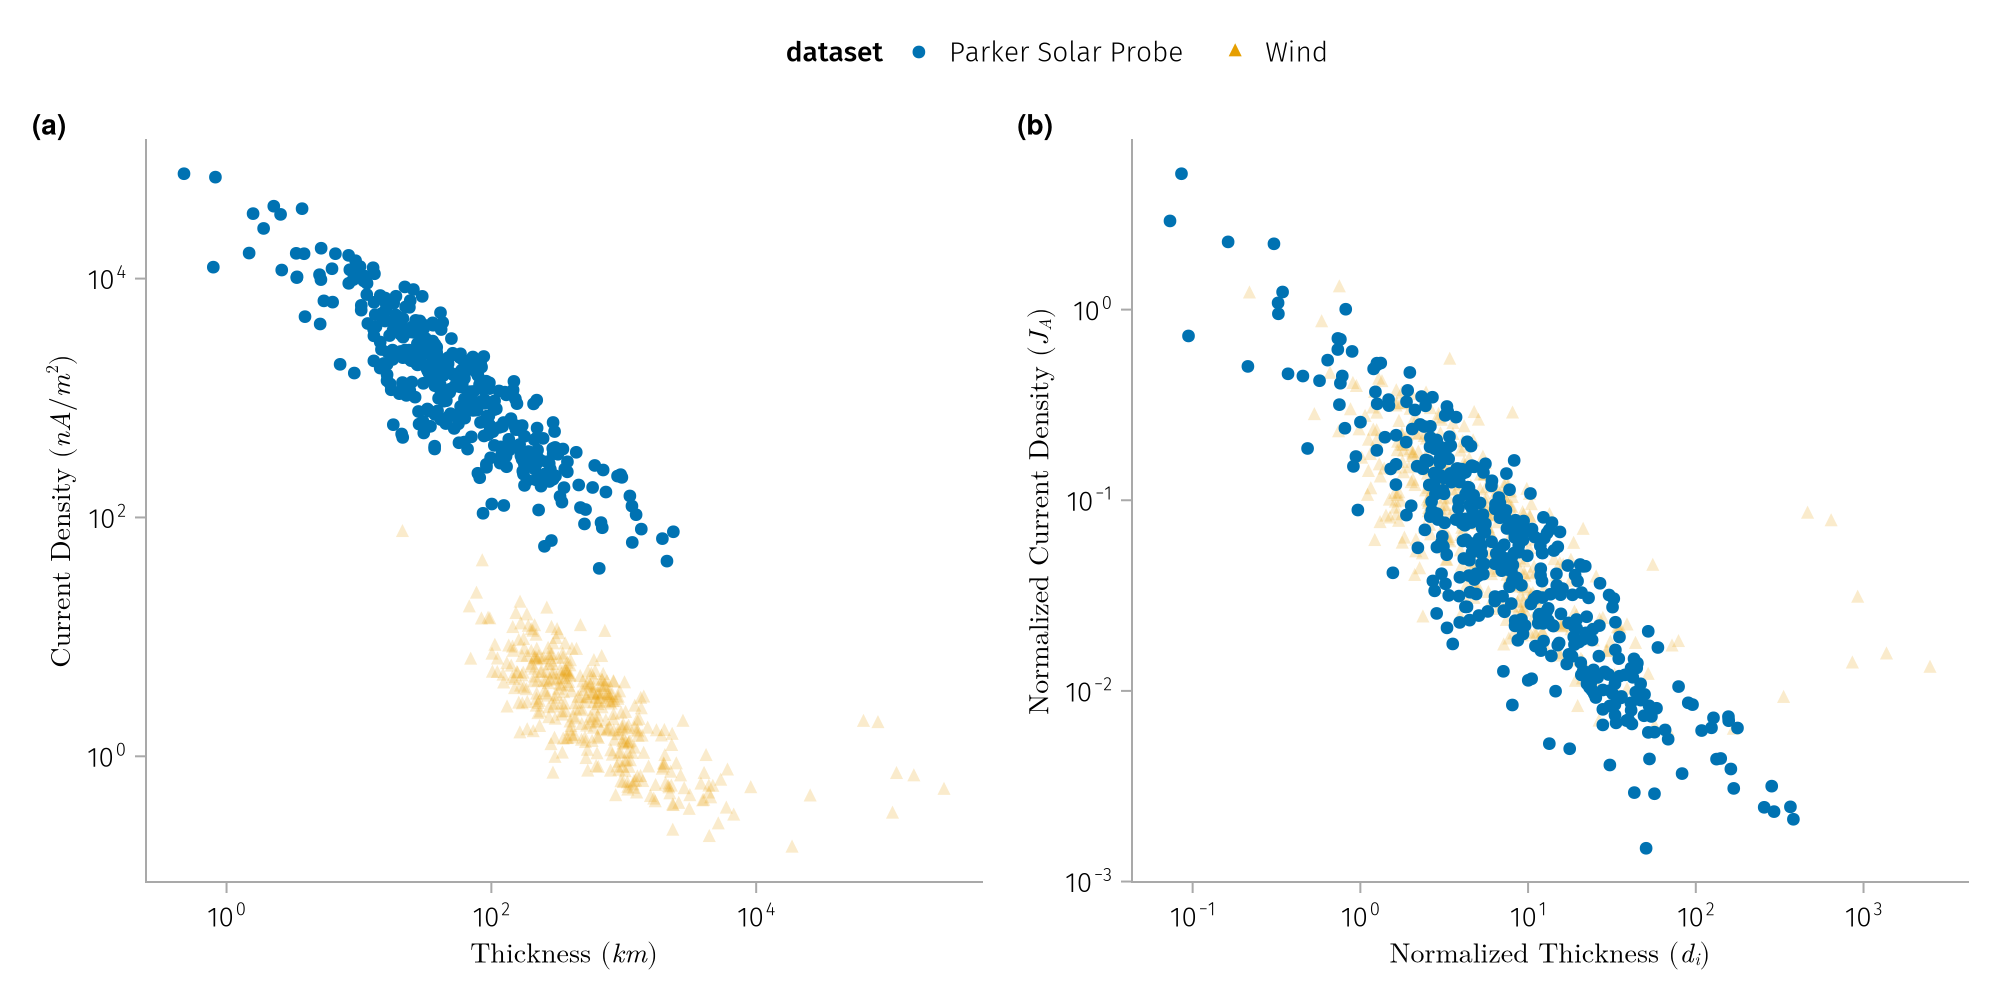

In [37]:
begin
    fname = "thickness_current"

    plt = data_layer_a * visual(Scatter)

    fig = Figure(size=(1000, 500))
    axis = log_axis

    ga = fig[1, 1]
    gb = fig[1, 2]

    grid1 = plt * mapping(l_map, j_map) |> draw!(ga; axis=axis)
    grid2 = plt * mapping(l_norm_map, j_norm_map) |> draw!(gb; axis=axis)

    pretty_legend!(fig, grid1)
    add_labels!([ga, gb])
    easy_save(fname; dir="$fig_dir/$enc")
    fig
end

┌ Info: Saved ../figures/enc2/density_distribution.spi_n_spi
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/utils.jl:11


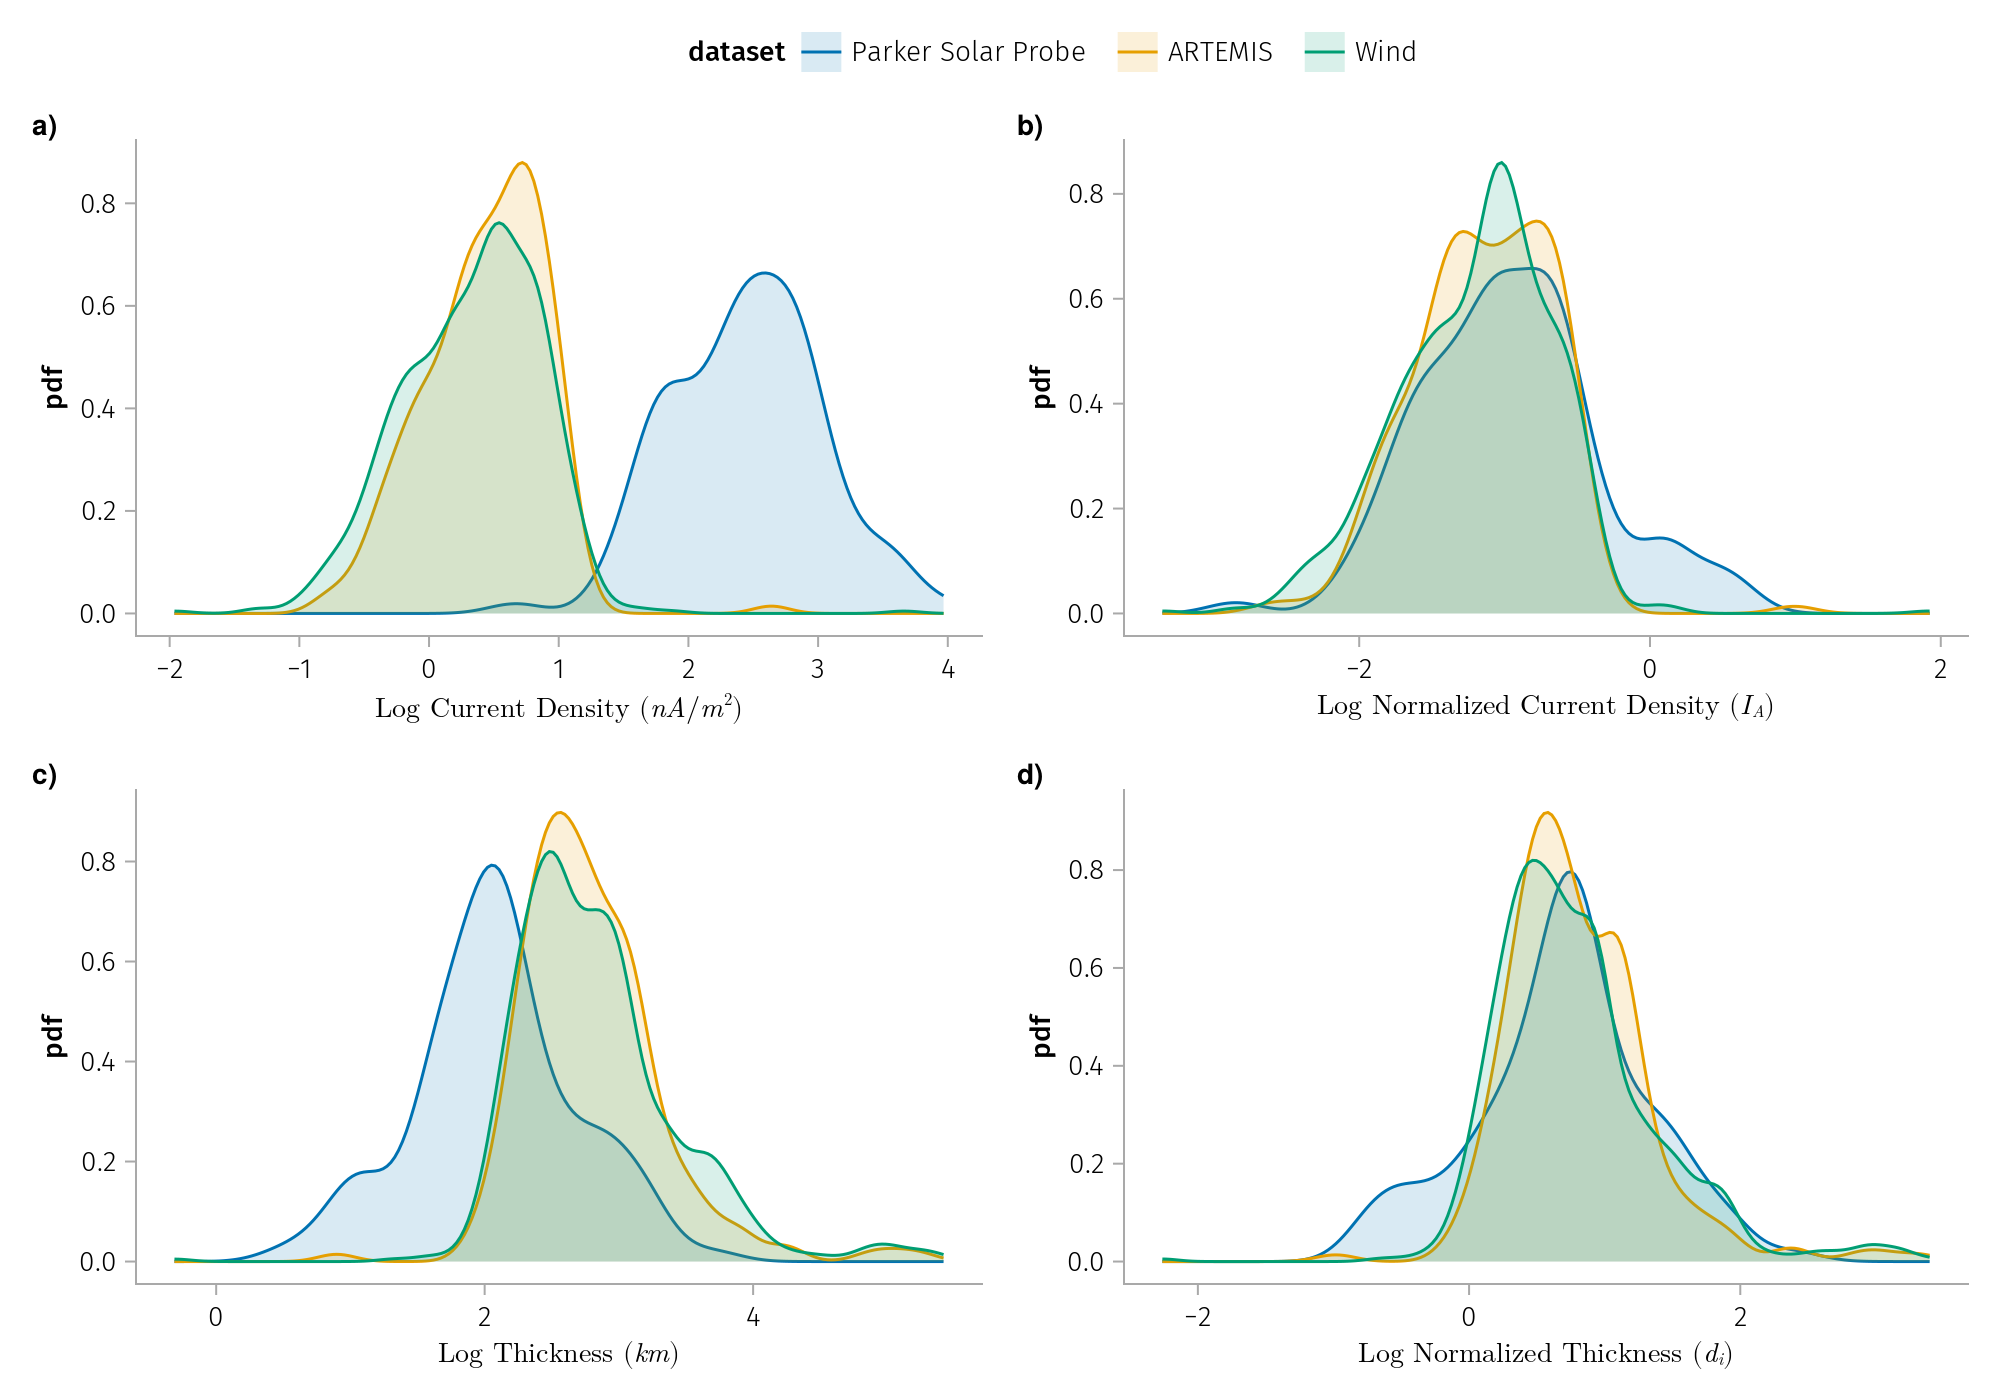

In [102]:
# plot the density distribution of the thickness and current density
function plot_dist()
    fname = "density_distribution"

    # data_layer = data_layer_a
    plt = data_layer * density()

    fig = Figure(size=(1000, 700))

    mapping_layer_j = mapping(:j0_k => log10 => L"Log %$(j_label)")
    mapping_layer_j_norm = mapping(:j0_k_norm => log10 => L"Log %$(j_norm_label)")
    mapping_layer_l = mapping(:L_k => log10 => L"Log %$(l_label)")
    mapping_layer_l_norm = mapping(:L_k_norm => log10 => L"Log %$(l_norm_label)")

    axis = (xscale = identity,)
    
    ga = fig[1, 1]
    gb = fig[1, 2]
    gc = fig[2, 1]
    gd = fig[2, 2]

    grid = draw!(ga, plt * mapping_layer_j; axis=axis)
    plt * mapping_layer_j_norm |> draw!(gb; axis=axis)
    plt * mapping_layer_l |> draw!(gc; axis=axis)
    plt * mapping_layer_l_norm |> draw!(gd; axis=axis)

    pretty_legend!(fig, grid)
    add_labels!([ga, gb, gc, gd]; labels=["a)", "b)", "c)", "d)"])
    easy_save("$fname$psp_p_instr", fig)

    fig
end

plot_dist()

`ggscatterhist` can not handle log scale well

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/dn-dB.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


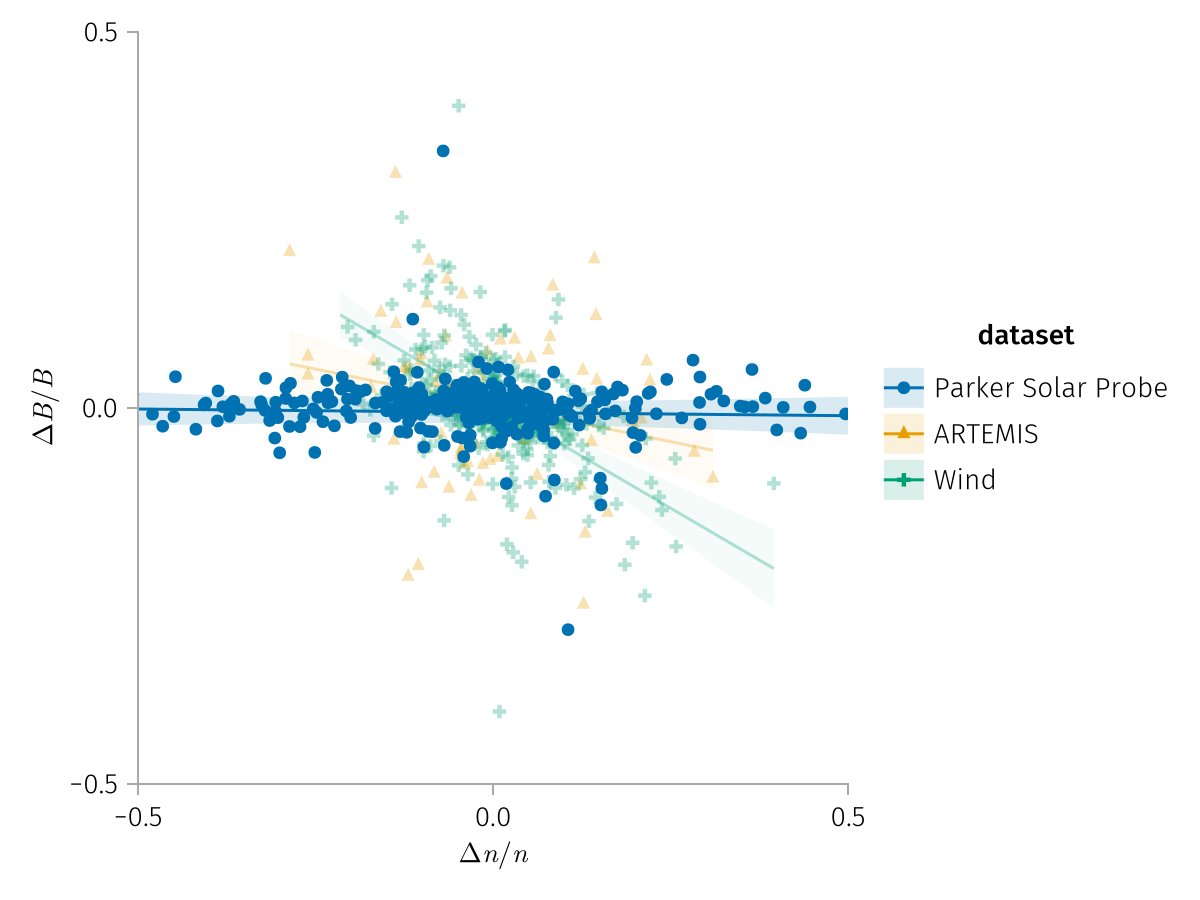

In [125]:
#| label: fig-dn-dB
#| column: screen
axis = (limits=((-0.5, 0.5), (-0.5, 0.5)),)

begin
    fname = "dn-dB"
    plt = data_layer_a * mapping(dn_over_n, dB_over_B)  * (linear() + visual(Scatter))
    fg = draw(plt, axis=axis)
    easy_save(fname; dir="$fig_dir/$enc")
end

In [126]:
#| label: fig-dn-dT
#| column: screen
begin
    fname = "dn-dT"
    plt = data_layer_a * mapping(dT_over_T, dn_over_n) * (mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[1, 1])
    grid2 = plt |> draw!(fig[1, 2]; axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save(fname; dir="$fig_dir/$enc")

    fig
end

ArgumentError: ArgumentError: column name "T.change" not found in the data frame; existing most similar names are: "B.change" and "n.change"

In [115]:
#| label: fig-dT-dB
#| column: screen
begin
    fname = "dT-dB"
    plt = data_layer_a * mapping(dT_over_T, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid = draw!(fig[1, 1], plt)
    draw!(fig[1, 2], plt, axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    pretty_legend!(fig, grid1)

    easy_save(fname; dir="$fig_dir/$enc")

    fig
end

ArgumentError: ArgumentError: column name "T.change" not found in the data frame; existing most similar names are: "B.change" and "n.change"

## Comparison of change in Alfven speed and plasma speed

The distinguishing feature of rotational discontinuities is the plasma velocity jump across them: the plasma ﬂow velocity $v_l$ (the solar wind velocity projected onto l) changes due to changes in $B_l$, $Δv_l=±Δv_A$ with $v_A= B_l / \sqrt{4 n m}$ (Landau & Lifshitz 1960; Hudson 1970).

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/dvl.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr/src/utils/makie.jl:34


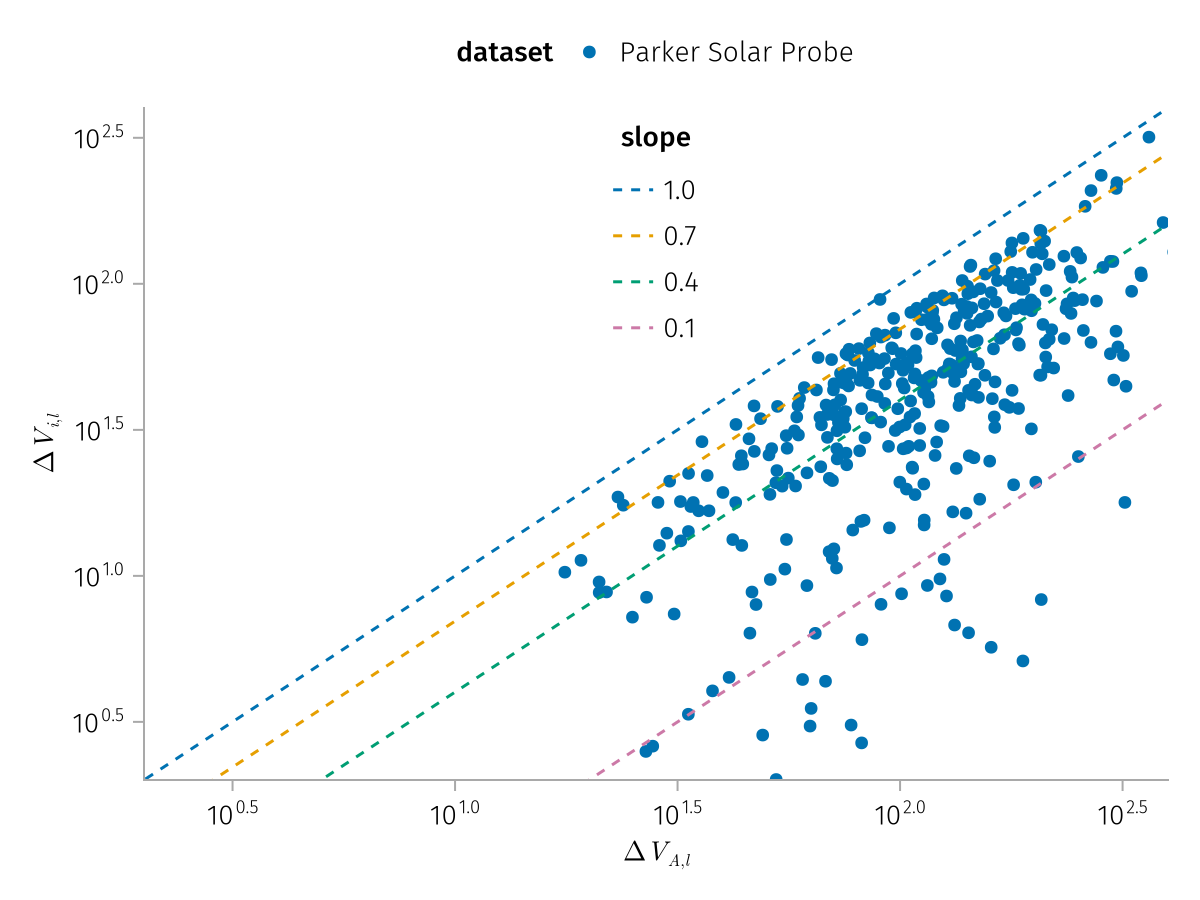

In [26]:
#| label: fig-dvl
#| column: screen
fig = plot_dvl(psp_df)

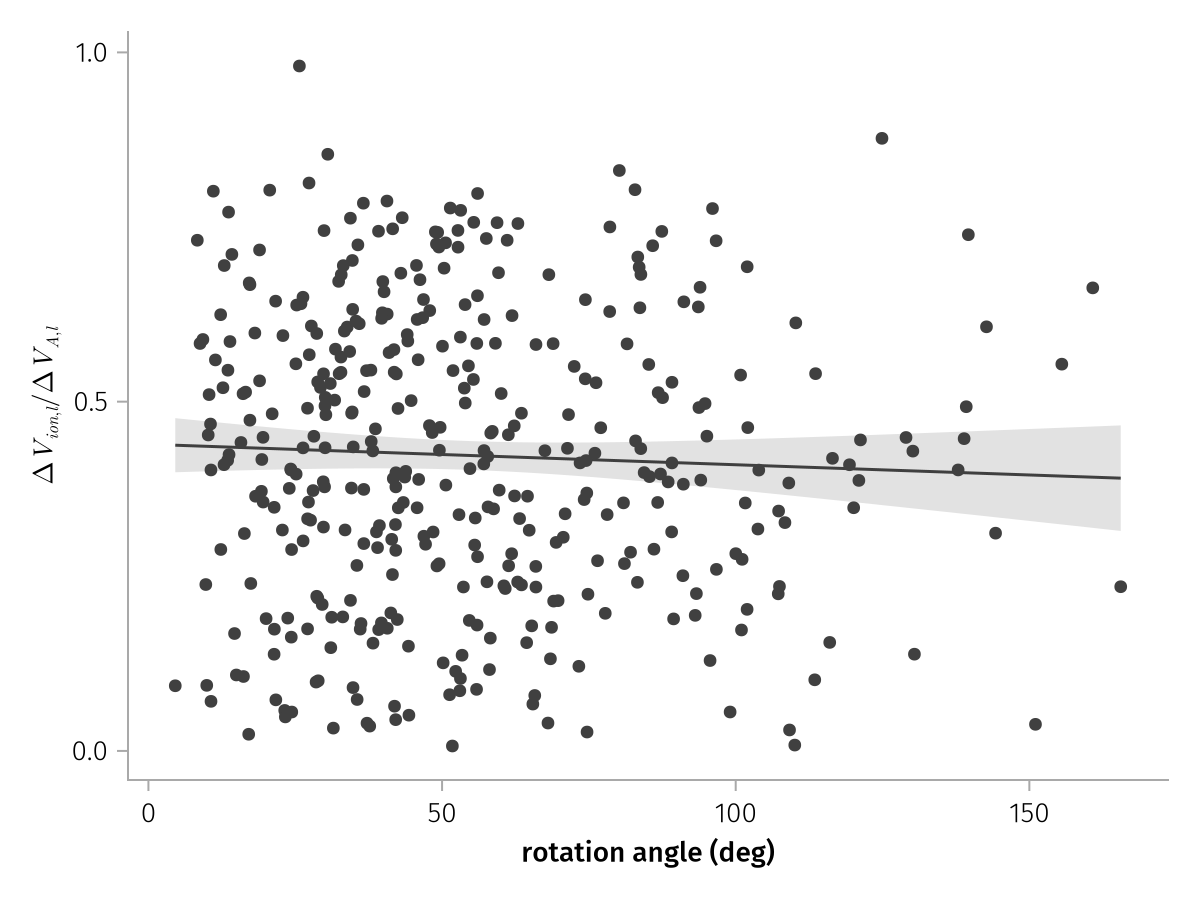

In [28]:
ω_map = :rotation_angle => "rotation angle (deg)";
v_l_ratio_map = :v_l_ratio => L"Δ V_{ion,l} / Δ V_{A,l}"
plt = data(psp_df) * mapping(ω_map, v_l_ratio_map) * (linear() + visual(Scatter))
draw(plt)

## Anistropy

@shenComparingPlasmaAnisotropy2024

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/anisotropy_comparison_2d.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


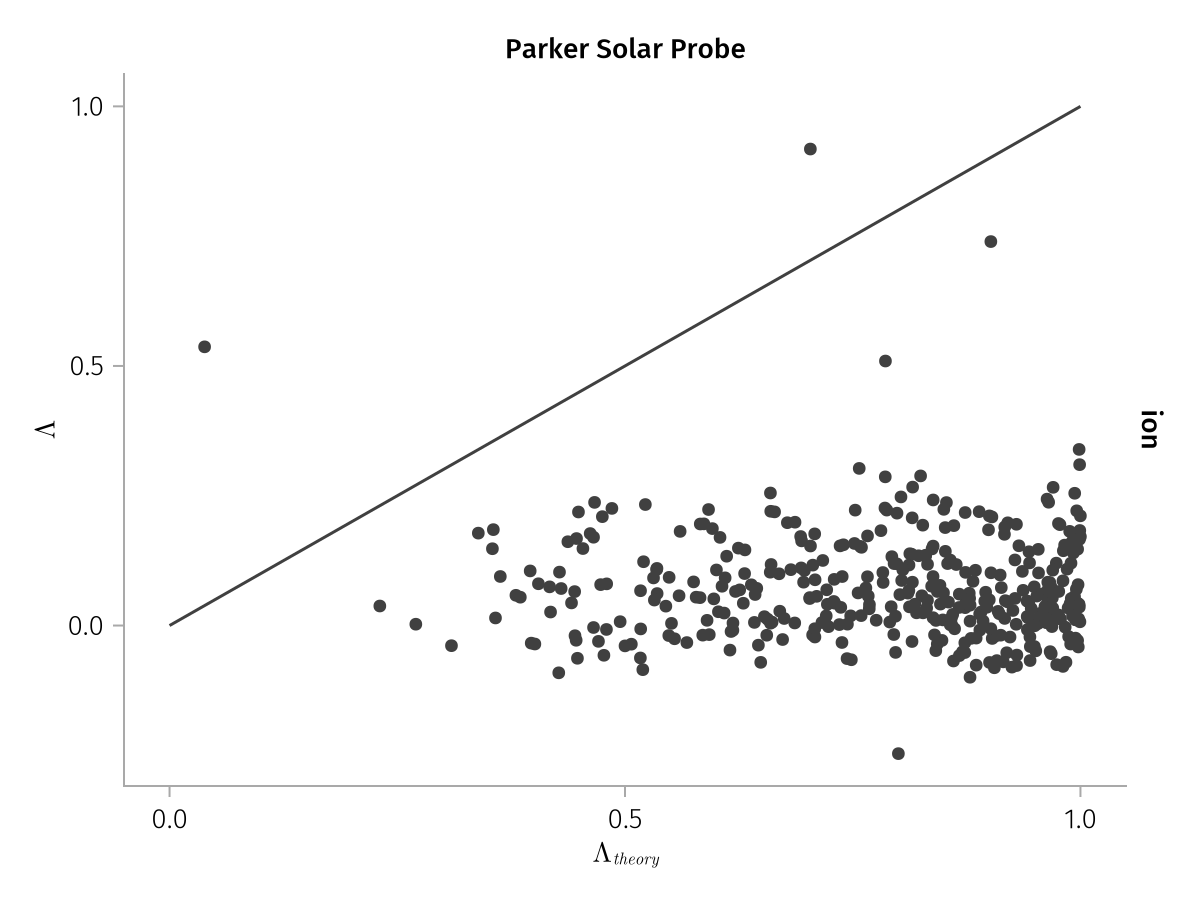

In [26]:
plot_anistropy_comparison_2d(psp_df)

In [22]:
psp_df.Λ_ion_r = abs.(psp_df.Λ_ion ./ psp_df.Λ_t .- 1)
first(sort(psp_df, :Λ_ion_r), 4)

Row,time,tstart,tstop,t.d_end,t.d_start,t.d_time,index_diff,len,std,std_prev,std_next,index_std,index_fluctuation,B.after,B.before,b_mag,b_n,bn_over_b,d_star,db_mag,db_over_b,db_over_b_max,fit.stat.chisqr,fit.stat.rsquared,fit.vars.amplitude,fit.vars.c,fit.vars.sigma,rotation_angle,dB_x,dB_y,dB_z,dB_lmn_x,dB_lmn_y,dB_lmn_z,k_x,k_y,k_z,Vl_x,Vl_y,Vl_z,Vn_x,Vn_y,Vn_z,duration,plasma_density,v_R,v_T,v_N,n.before,v_R_before,v_T_before,v_N_before,n.after,v_R_after,v_T_after,v_N_after,v_l,v_n,v_k,L_k,j0_k,ion_inertial_length,Alfven_speed,j_Alfven,L_k_norm,j0_k_norm,v.ion.before.l,v.ion.after.l,B.vec.before.l,B.vec.before.m,B.vec.before.n,B.vec.after.l,B.vec.after.m,B.vec.after.n,v.Alfven.before,v.Alfven.after,v.Alfven.before.l,v.Alfven.after.l,n.change,v.ion.change.l,B.change,v.Alfven.change,v.Alfven.change.l,ion_temp_para,ion_temp_perp,Λ_ion,dataset,B.mean,n.mean,Λ_t,Λ_ion_r
,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,Float64,UInt32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float32,Float64,Float64,Float64,Float32,Float64,Float64,Float64,Float32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float32,Float64,Float64,Float64,Float64,Float32,Float32,Float64,String,Float64,Float32,Float64,Float64
1,2021-01-17T13:23:04,2021-01-17T13:22:56,2021-01-17T13:23:12,2021-01-17T13:23:11.442,2021-01-17T13:22:59.208,2021-01-17T13:23:05.131,0.648186,73,26.5526,10.7862,9.1192,2.46173,1.16665,101.789,44.0335,75.0677,2.27744,0.0303385,35.13,57.7554,0.769377,0.769377,2166.56,0.936807,50.5067,3.45086,0.359427,38.8267,55.2233,-46.3511,10.8783,-64.0992,-34.7455,-0.648997,0.0884341,-0.12652,-0.988014,0.357252,-0.921461,0.152579,-0.0675537,0.13744,0.988204,0.718854,2732.35,381.362,-138.215,3.01064,2762.37,379.928,-140.686,3.44903,2693.38,377.506,-133.004,0.147888,264.061,41.7835,48.2377,34.6759,579.538,4.35666,31.3158,13709.1,7.95929,0.0422739,265.893,257.445,0.353517,44.0201,1.0304,64.4527,78.7656,1.6794,18.2693,42.7691,0.146672,27.0814,-68.9861,8.44747,57.7554,24.4998,26.9347,64.687,57.5403,0.73955,Parker Solar Probe,72.9112,2727.87,0.901638,0.179771
2,2021-01-17T14:00:48,2021-01-17T14:00:40,2021-01-17T14:00:56,2021-01-17T14:00:53.754,2021-01-17T14:00:47.855,2021-01-17T14:00:47.086,0.361529,73,31.854,15.1253,6.79863,2.106,1.44077,136.929,218.531,155.794,-5.14073,-0.0329971,12.1512,-81.6016,0.52378,0.52378,3746.21,0.592843,115.799,-239.374,2.38247,7.16678,80.6002,-3.1367,24.9029,-84.416,-0.564816,-0.0287437,-0.166979,0.75391,0.635404,0.953005,-0.0410342,0.300163,-0.128284,0.842916,0.522529,4.76494,3863.79,394.834,-209.22,91.757,3787.03,386.74,-202.149,83.7244,3771.57,370.53,-189.192,63.788,412.406,179.06,165.359,787.925,58.4764,3.66366,54.6539,33833.3,215.065,0.00172837,401.991,380.027,-213.71,-45.1632,-6.63765,-129.294,-44.5984,-6.60891,77.4356,48.6197,-75.7273,-45.9086,-15.4636,21.9645,-81.6016,-28.8159,29.8187,62.6138,39.6508,0.565511,Parker Solar Probe,177.73,3779.3,0.45742,0.236305
3,2021-01-17T14:04:16,2021-01-17T14:04:08,2021-01-17T14:04:24,2021-01-17T14:04:21.940,2021-01-17T14:04:13.421,2021-01-17T14:04:17.681,0.929971,73,41.46,17.2032,14.9907,2.41002,1.25386,117.341,19.9397,95.0441,-10.1505,-0.106798,-27.2953,97.4013,1.0248,1.0248,37673.6,0.0644105,-132.883,0.828218,1.21708,140.995,130.362,28.4358,0.136201,132.883,10.212,6.38537,0.164659,-0.75789,0.631261,-0.968391,-0.233127,-0.0887121,-0.249287,0.916793,0.312005,2.43417,3671.34,347.46,-127.721,-19.1184,3696.02,346.453,-129.023,-16.8507,3632.13,345.098,-126.874,-11.6083,-305.006,209.676,141.942,345.511,153.027,3.75845,34.2051,20119.9,91.929,0.00760574,-303.929,-303.582,17.4386,-4.63218,-8.4872,-11

┌ Info: Saved /Users/zijin/projects/psp_conjunction/notebooks/figures/anisotropy.spi_n_spi.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


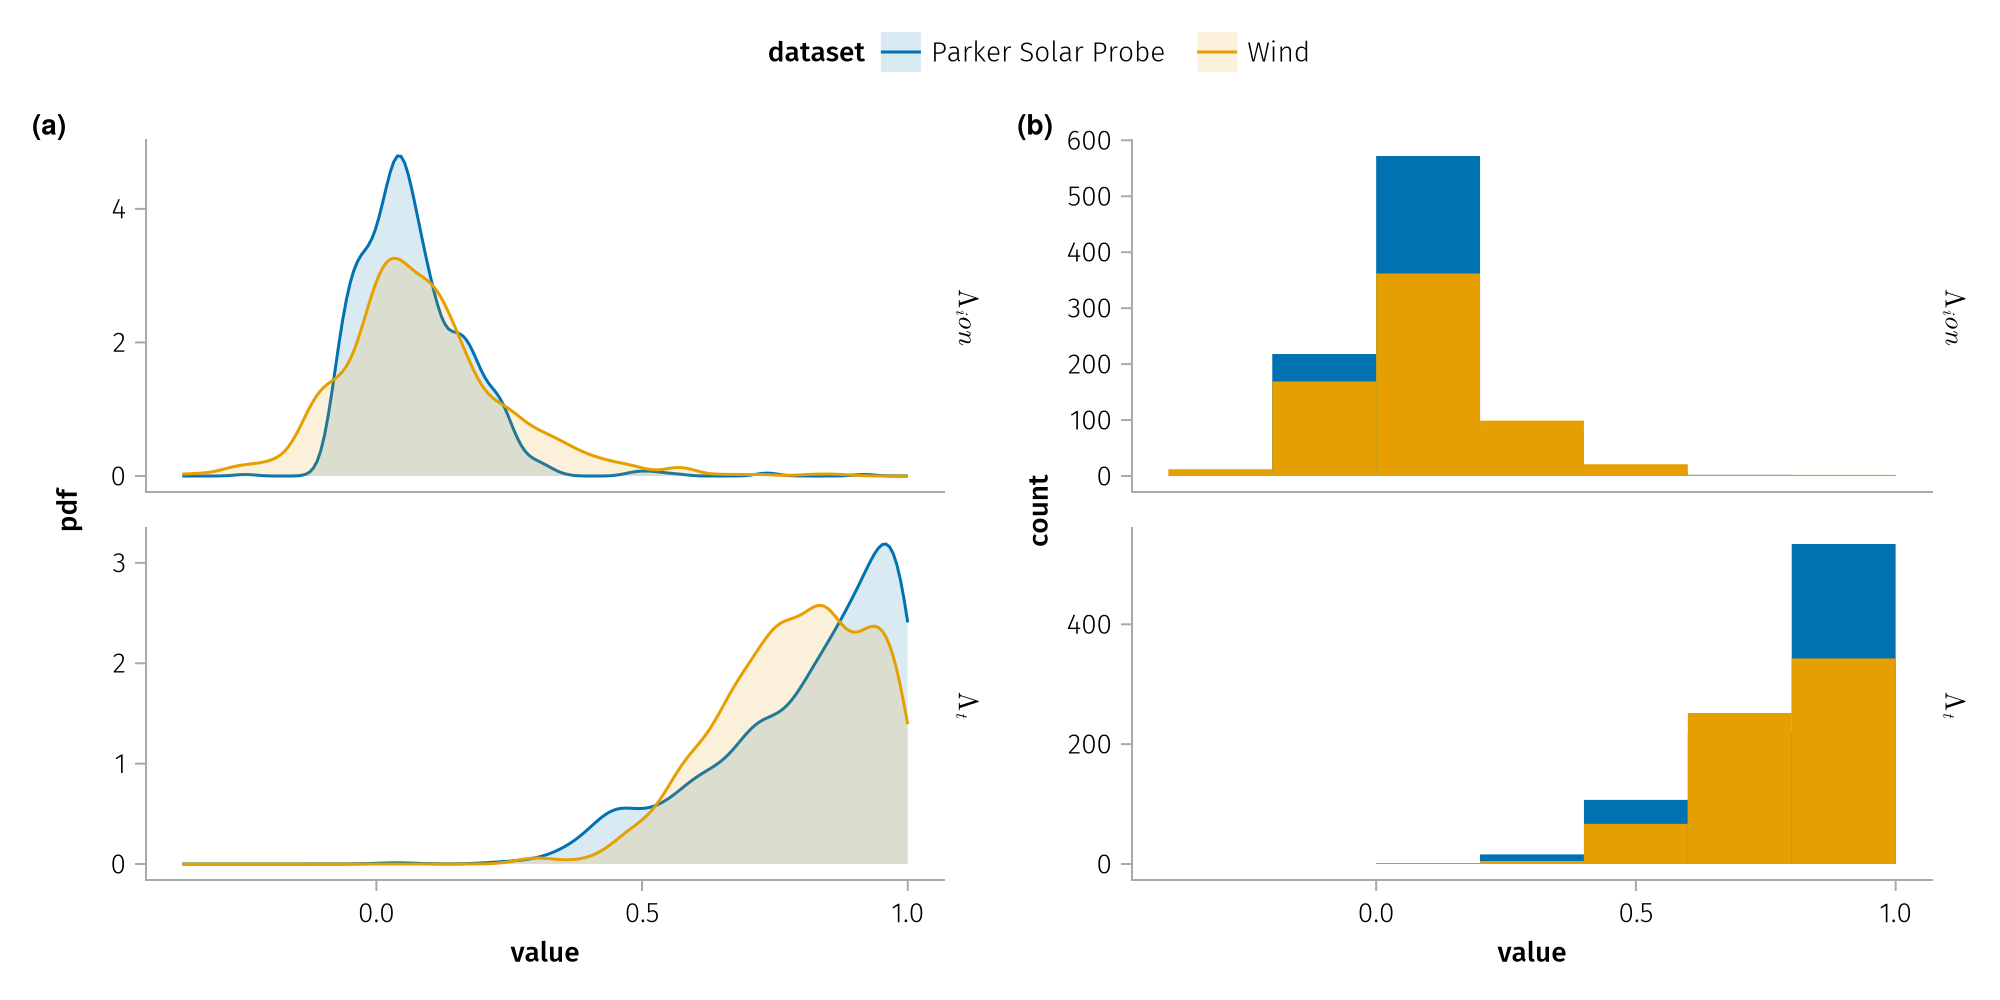

In [46]:
plot_anistropy(df)

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/anisotropy_theory.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


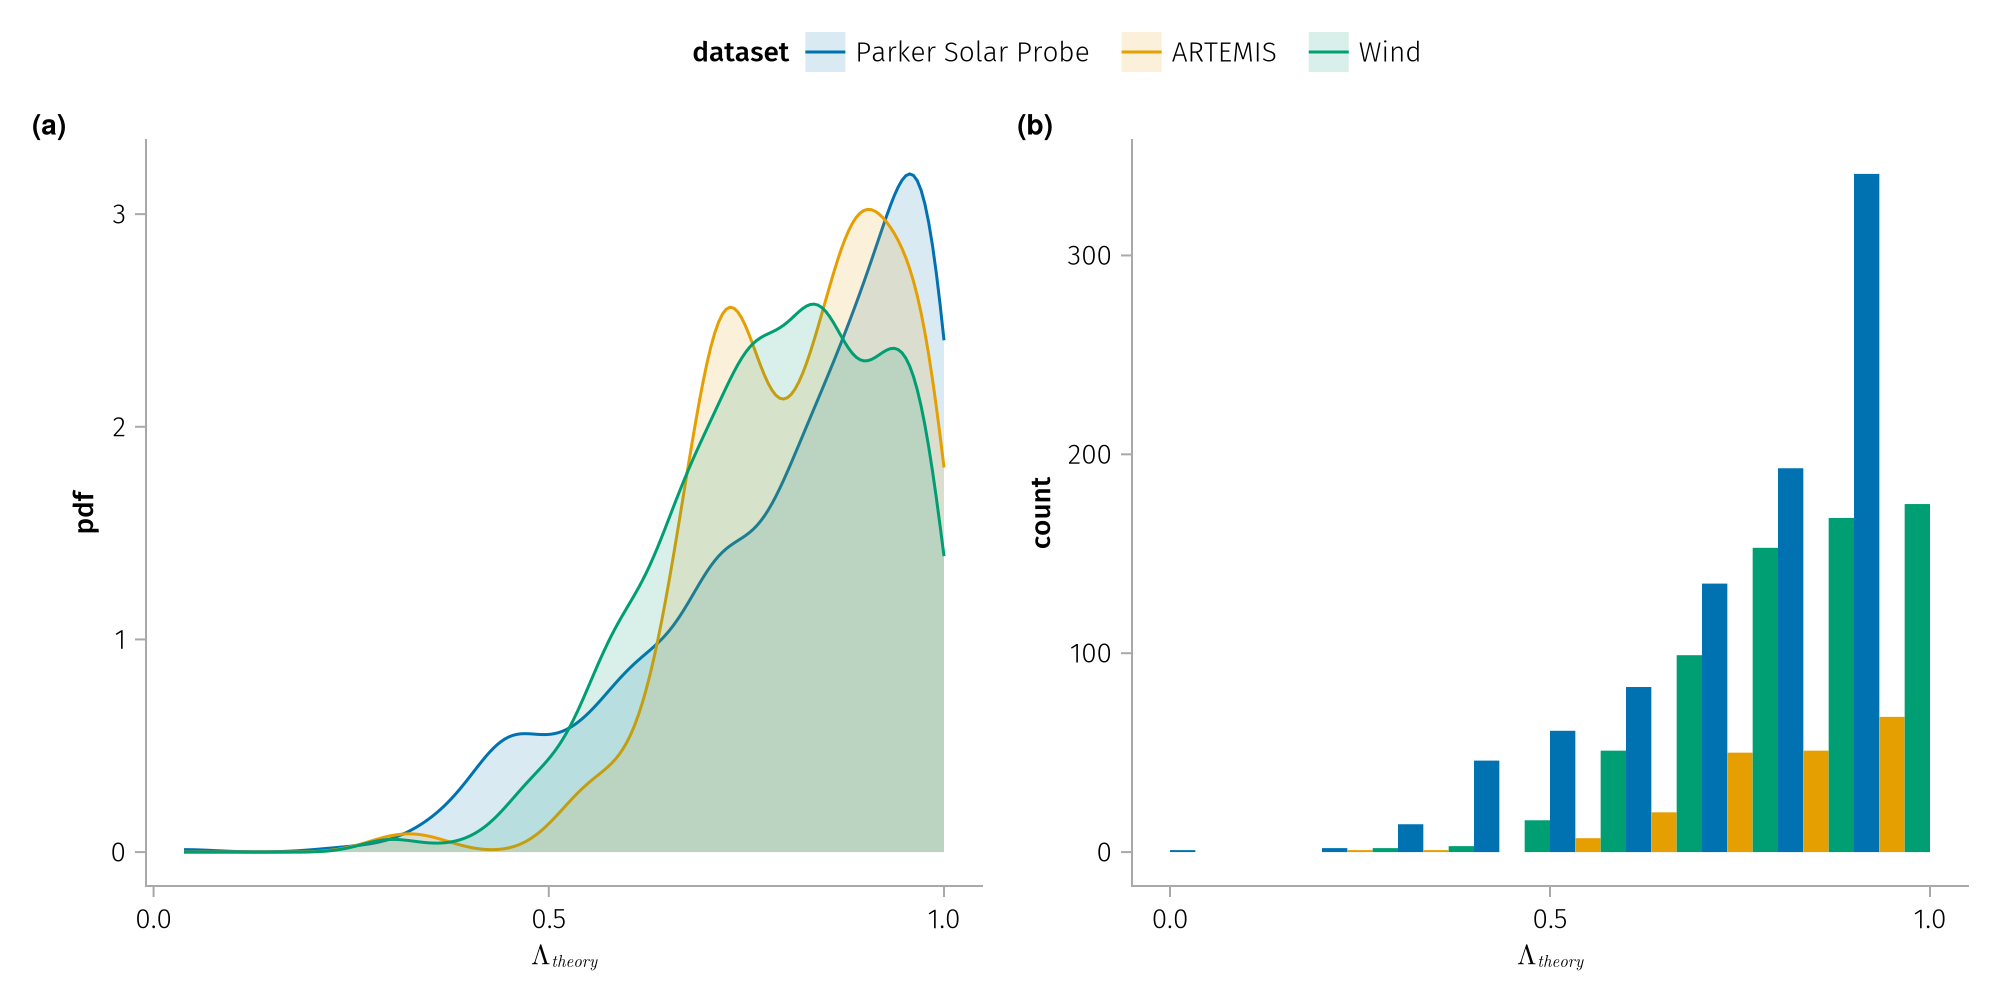

In [59]:
#| label: fig-anisotropy
#| column: screen
plot_anistropy_theory(df)

In [35]:
function plot_anistropy_comparison()
    fname = "anisotropy_comparison"

    fig = Figure(size=(1000, 800))

    plt_Λ = data(
        stack(earth_df, [:Λ, :Λ_t, :Λ_ion, :Λ_e], [:time, :dataset])
    ) * mapping(:value => L"\Lambda", color=:variable, marker=:variable, col=:dataset)

    grid1 = plt_Λ * density() |> draw!$fig[1, 1:2]
    grid2 = plt_Λ * histogram() |> draw!$fig[2, 1:2]
    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

function plot_anistropy_comparison_i_e()
    fname = "anisotropy_comparison_i_e"

    mapping_layer = mapping(
        Λ_e_map, Λ_ion_map,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_e=[0, 0.3], Λ_ion=[0, 0.3])

    plt = (data(earth_df) * mapping(row=:dataset) + data(df2) * visual(Lines)) * mapping_layer

    fig = draw(plt, facet=(; linkxaxes=:minimal, linkyaxes=:minimal))
    fig
end

plot_anistropy_comparison_i_e (generic function with 1 method)

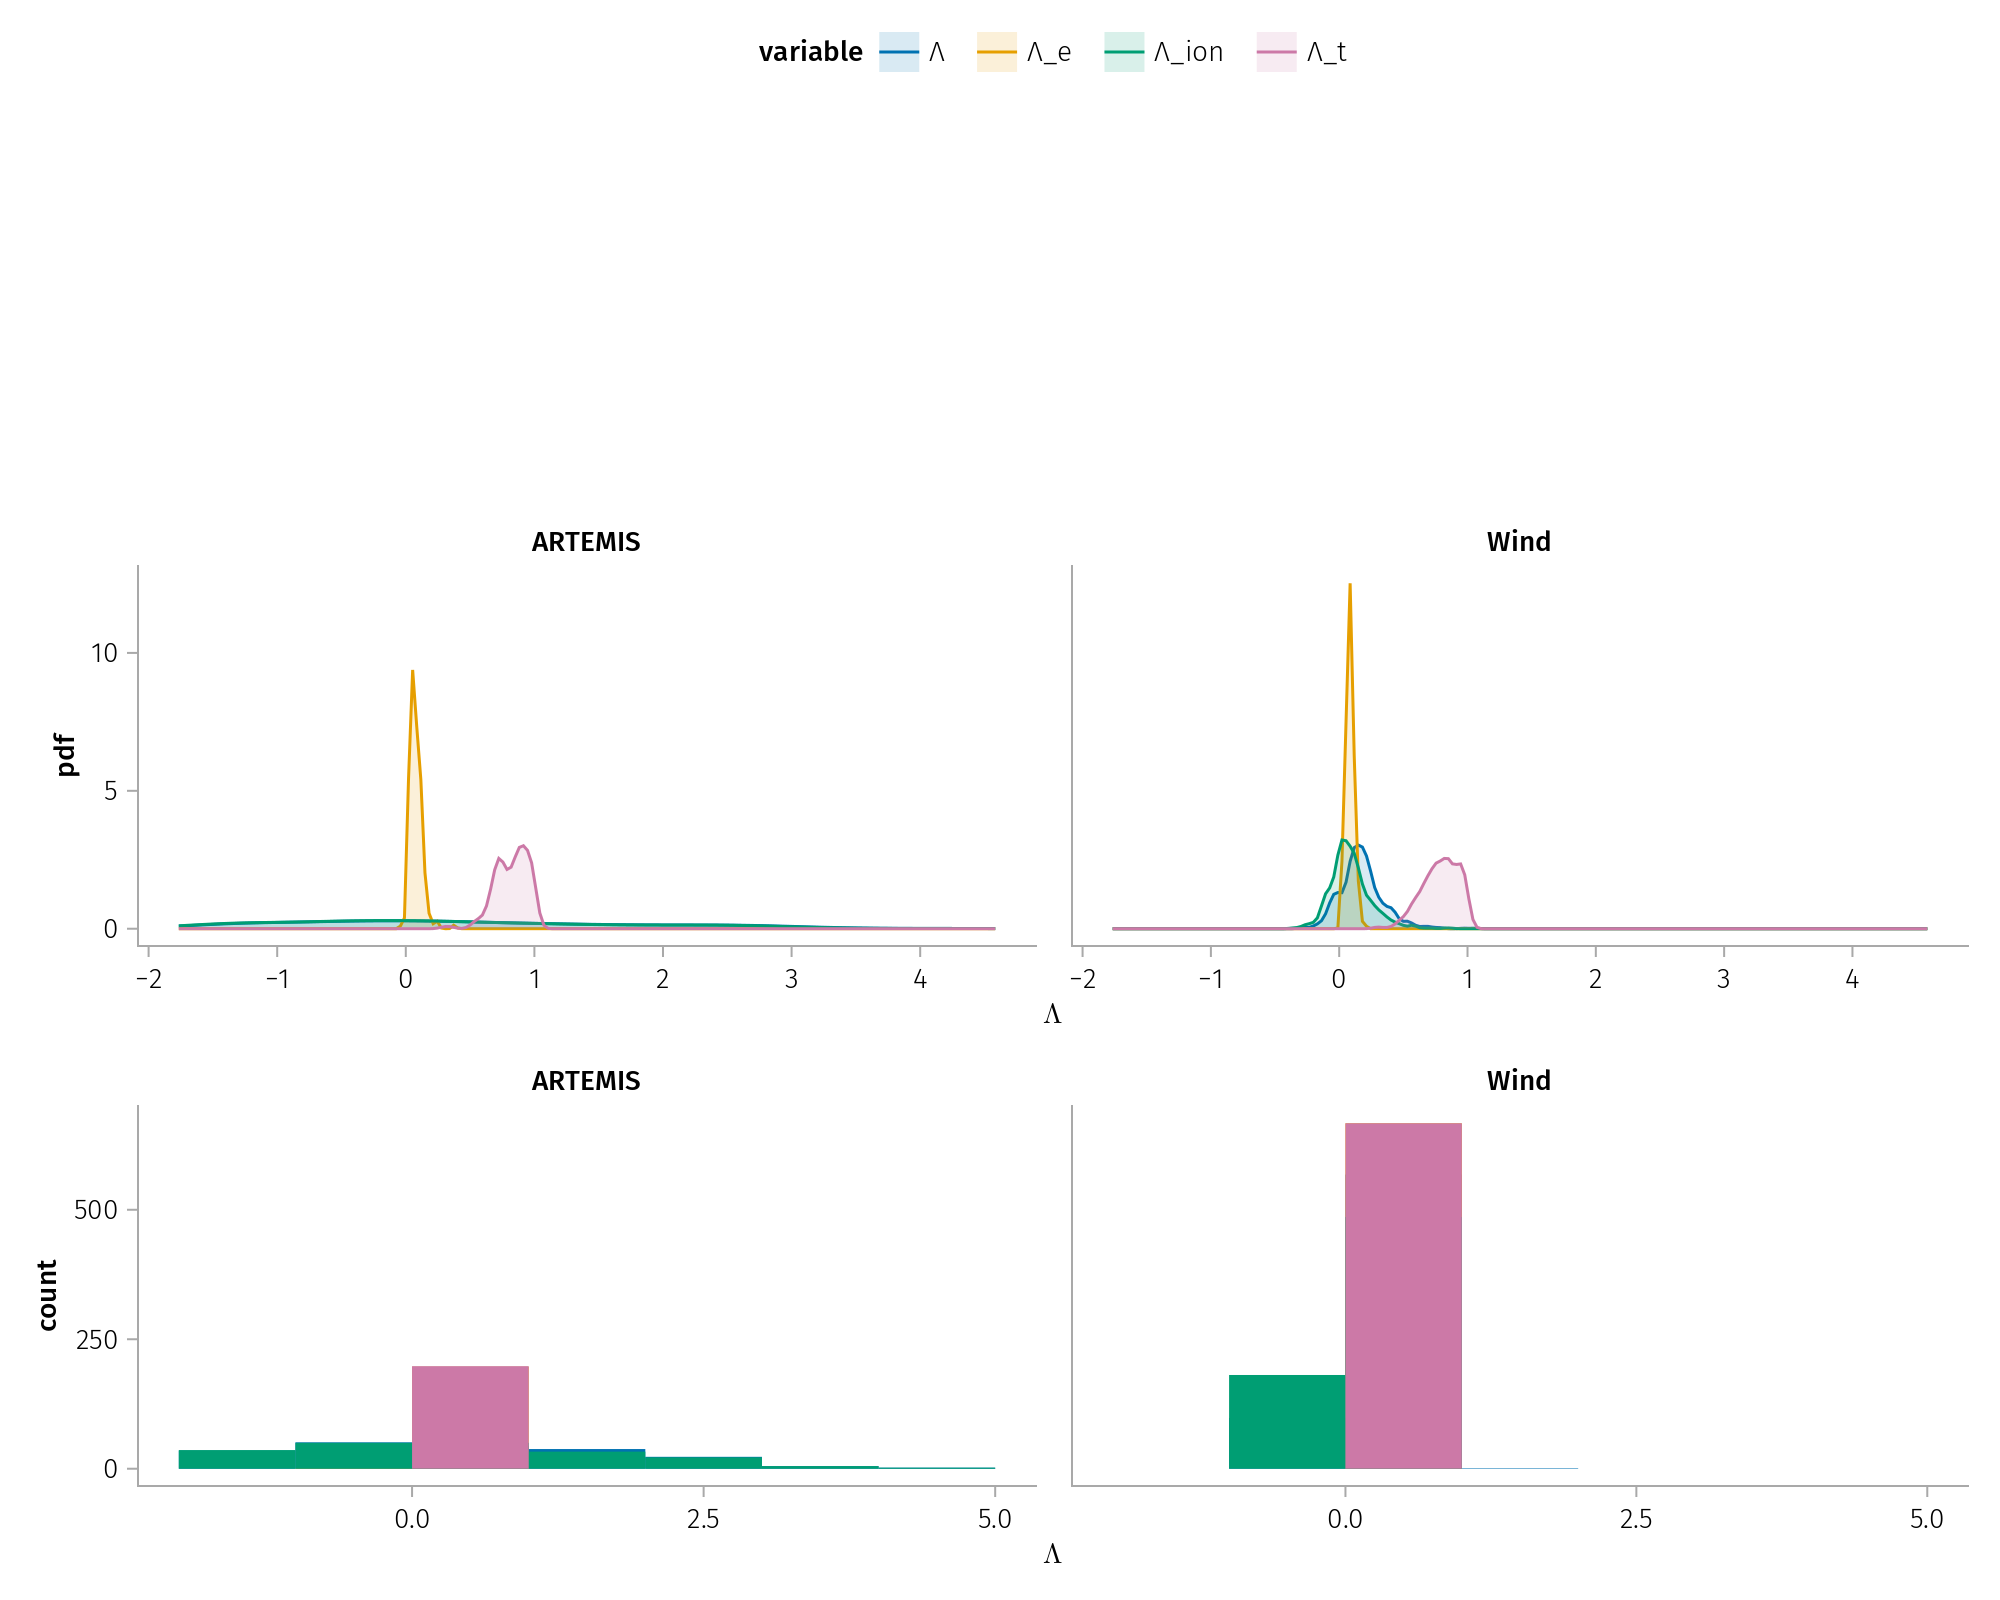

In [37]:
#| label: fig-anisotropy-comp
#| column: screen
plot_anistropy_comparison()

In [36]:
#| label: fig-anisotropy-comp-2d
#| column: screen
plot_anistropy_comparison_2d()

MethodError: MethodError: no method matching plot_anistropy_comparison_2d()

Closest candidates are:
  plot_anistropy_comparison_2d(!Matched::Any)
   @ Main ~/projects/psp_conjunction/notebooks/utils/anisotry.jl:11


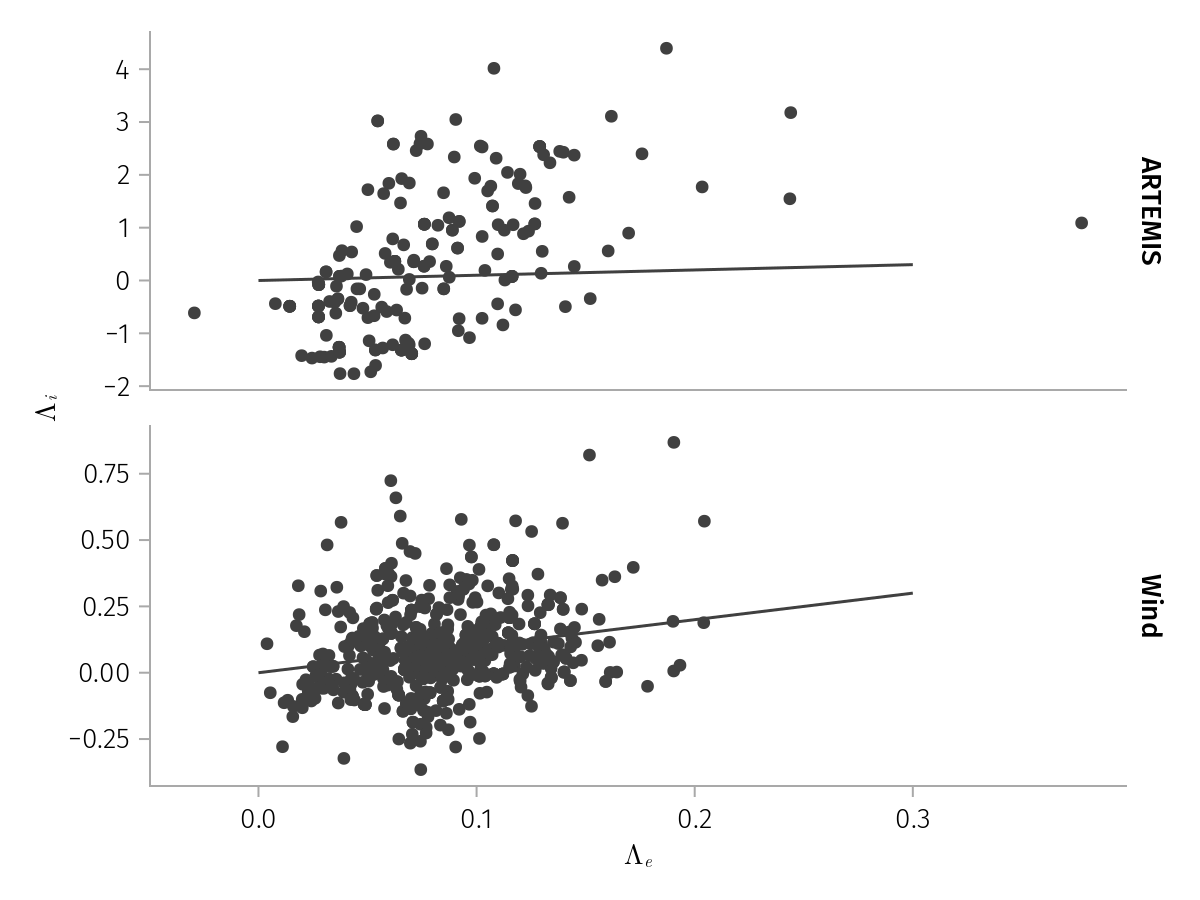

In [250]:
#| label: fig-anisotropy-comp-i-e
#| column: screen
plot_anistropy_comparison_i_e()